In [4]:
import xarray as xr
data_temp = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_Temp\*.nc", parallel=True)
data_tmax = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_tmax\*.nc", parallel=True)
data_tmin = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_tmin\*.nc", parallel=True)
data_rain = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_Rain\*.nc", parallel=True)
data_hurs = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_Humidity\*.nc", parallel=True)
data_sun = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_Sun\*.nc", parallel=True)
data_frost = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_Frost\*.nc", parallel=True)
data_psl = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_psl\*.nc", parallel=True)
data_wind = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_Wind\*.nc", parallel=True)

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

projection_x_coordinate = np.array(data_temp['projection_x_coordinate'])
projection_y_coordinate = np.array(data_temp['projection_y_coordinate'])

scaler = MinMaxScaler()

# Normalize spatial coordinates
pyc = scaler.fit_transform(projection_y_coordinate.reshape(-1, 1))
pxc = scaler.fit_transform(projection_x_coordinate.reshape(-1, 1))

rain = np.array(data_rain['rainfall'])
hurs = np.array(data_hurs['hurs'])
temp = np.array(data_temp['tas'])
temp_max = np.array(data_tmax['tasmax'])
temp_min = np.array(data_tmin['tasmin'])
sun = np.array(data_sun['sun'])
frost = np.array(data_frost['groundfrost'])
psl = np.array(data_psl['psl'])
wind = np.array(data_wind['sfcWind'])

min_length = len(wind)
rain = rain[:min_length]
hurs = hurs[:min_length]
temp = temp[:min_length]
temp_max = temp_max[:min_length]
temp_min = temp_min[:min_length]
sun = sun[:min_length]
frost = frost[:min_length]
wind = wind[:min_length]
psl = psl[:min_length]

In [169]:
# Create meshgrid for spatial coordinates
pyc_mesh, pxc_mesh = np.meshgrid(pyc.flatten(), pxc.flatten())

# Flatten the meshgrid arrays
pyc_flat = pyc_mesh.flatten()
pxc_flat = pxc_mesh.flatten()

# Repeat each spatial coordinate combination for the number of time values
num_time_values = len(rain)
pyc_flat = np.repeat(pyc_flat, num_time_values)
pxc_flat = np.repeat(pxc_flat, num_time_values)

# Flatten time arrays
rain_flat = rain.flatten()
hurs_flat = hurs.flatten()
temp_flat = temp.flatten()
temp_max_flat = temp_max.flatten()
temp_min_flat = temp_min.flatten()
sun_flat = sun.flatten()
frost_flat = frost.flatten()
psl_flat = psl.flatten()
wind_flat = wind.flatten()

# Create DataFrame
df = pd.DataFrame({
    'projection_y_coordinate': pyc_flat,
    'projection_x_coordinate': pxc_flat,
    'Rain': rain_flat,
    'Hurs': hurs_flat,
    'Temp': temp_flat,
    'Temp_Min': temp_min_flat,
    'Temp_Max': temp_max_flat,
    'Sun': sun_flat,
    'Frost': frost_flat,
    'Psl': psl_flat,
    'Wind': wind_flat
})

In [170]:
# List of columns to check for NaN values
columns_to_check = ['Rain', 'Hurs', 'Temp', 'Temp_Min', 'Temp_Max', 'Sun', 'Frost', 'Psl', 'Wind']

# Create a boolean mask indicating rows with NaN values in the specified columns
nan_mask = df[columns_to_check].isnull().any(axis=1)

# Filter the DataFrame to keep rows without NaN values in the specified columns
df_filtered = df[~nan_mask]

In [171]:
df_filtered

,projection_y_coordinate,projection_x_coordinate,Rain,Hurs,Temp,Temp_Min,Temp_Max,Sun,Frost,Psl,Wind
852,0.009009,0.0,126.147451,90.974516,7.942743,6.529507,9.483172,52.679074,4.993733,1011.305341,7.837565
932,0.009009,0.0,135.781950,89.126366,8.190250,6.601715,9.772596,53.206094,8.241496,1011.004080,6.831000
933,0.009009,0.0,136.153542,90.382016,7.702709,6.083515,9.391944,51.006741,8.111889,1011.190085,6.065469
934,0.009009,0.0,146.281093,92.148919,7.530887,5.920506,9.284392,50.349402,10.444545,1011.223684,6.494661
1015,0.009009,0.0,131.803960,89.188032,7.908033,6.403731,9.432582,49.513828,7.012561,1011.116773,6.079681
...,...,...,...,...,...,...,...,...,...,...,...
5950794,1.000000,1.0,142.087923,79.461483,3.691437,1.923258,5.506234,10.497998,15.228559,1001.843373,8.494136
5950876,1.000000,1.0,167.382607,79.888634,3.709721,2.035055,5.437188,9.893316,15.112403,1001.732963,9.363961
5950877,1.000000,1.0,175.431880,80.384491,3.909819,2.415599,5.660394,12.051018,14.321967,1001.773660,10.057385
5950959,1.000000,1.0,161.446328,81.476529,3.445058,1.515693,5.425583,9.586379,15.877283,1001.559028,8.303095


In [172]:
# Define the range of years
start_year = 1969
end_year = 2022

# Define the years you want to assign to each row
years = np.arange(start_year, end_year + 1)

# Repeat each year for each combination of spatial coordinate and time value once
num_combinations = len(df_filtered) 
years_repeated = np.tile(years, num_combinations)

# Add the year column to your DataFrame using .loc
df_filtered.loc[:, 'Year'] = years_repeated[:len(df_filtered)]


C:\Users\iarla\AppData\Local\Temp\ipykernel_24540\2115229586.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.loc[:, 'Year'] = years_repeated[:len(df_filtered)]


In [173]:
# Define the years of interest
years_of_interest = range(2013, 2023)

# Find the indices of rows corresponding to the years of interest
indices_of_interest = df_filtered[df_filtered['Year'].isin(years_of_interest)].index

# Create a new DataFrame with the rows corresponding to the years of interest
new_df_filtered = df_filtered.loc[indices_of_interest].copy()

# Remove the filtered rows from the original DataFrame by creating a copy
df_filtered = df_filtered.drop(indices_of_interest)

In [174]:
new_df_filtered

,projection_y_coordinate,projection_x_coordinate,Rain,Hurs,Temp,Temp_Min,Temp_Max,Sun,Frost,Psl,Wind,Year
1355,0.018018,0.0,75.122752,87.820079,7.066459,4.652719,9.496004,61.328209,15.754712,1011.626903,5.792738,2013
1358,0.018018,0.0,74.722797,88.151241,7.171069,4.727571,9.752988,68.660224,13.303446,1011.716412,6.466739,2014
1359,0.018018,0.0,76.758510,88.152515,6.388286,3.852166,8.937728,68.277069,15.631113,1011.721162,6.913290,2015
1360,0.018018,0.0,87.381053,88.056528,6.395669,3.982191,8.943188,69.733919,17.834980,1011.745675,6.015118,2016
1361,0.018018,0.0,86.084085,87.619765,6.753537,4.133092,9.396187,71.662597,17.885060,1011.804720,5.273851,2017
...,...,...,...,...,...,...,...,...,...,...,...,...
5949309,0.981982,1.0,58.625933,91.611267,2.843987,0.061295,5.741640,28.193768,21.085514,1005.820466,4.238288,2018
5949382,0.981982,1.0,90.796143,83.109668,2.971155,1.425592,4.839639,22.561367,8.794880,1004.965121,6.312010,2019
5949383,0.981982,1.0,82.877643,83.474671,2.712619,0.871979,4.854421,20.168091,11.434160,1004.987608,5.407377,2020
5949386,0.981982,1.0,75.343349,83.641669,3.238767,0.844590,5.734249,20.177609,10.612270,1005.630589,5.545080,2021


## Temp (2003-2022)

In [103]:
# Target variable (future temperatures over the entire grid)
y = df_filtered['Temp'].values

# Features
X = df_filtered.drop(['Temp', 'Temp_Min', 'Temp_Max'], axis=1).values

Mean Squared Error: 0.4434517952576669
R-squared Value: 0.978298767168275


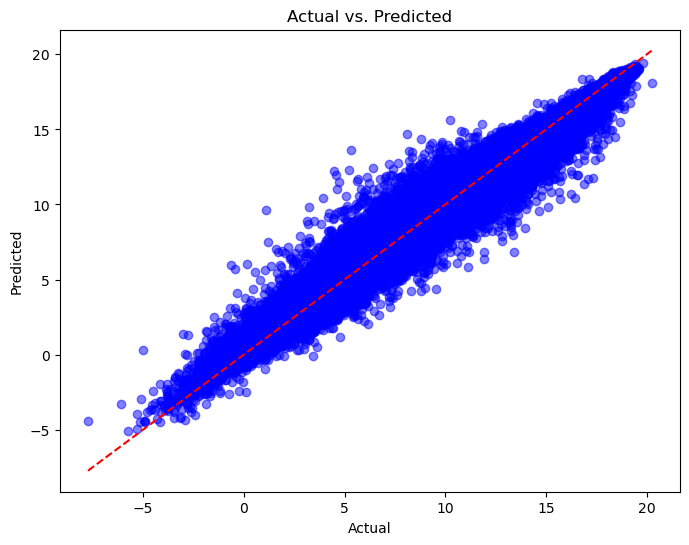

In [104]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and Train the Gradient Boosting Regression Model
rf_regressor = RandomForestRegressor(random_state=42, n_estimators=150)
rf_regressor.fit(X_train, y_train)


y_pred = rf_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared value
r_squared = r2_score(y_test, y_pred)
print("R-squared Value:", r_squared)

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

In [105]:
# Separate the temperature column before prediction
X_temp = new_df_filtered['Temp'].values.reshape(-1, 1)
X_new = new_df_filtered.drop(['Temp', 'Temp_Min', 'Temp_Max'], axis=1).values

# Assuming rf_model is your trained Random Forest model
future_predictions = rf_regressor.predict(X_new)

print(future_predictions)
print(future_predictions.shape)

[6.45332929 5.5965263  6.22995201 ... 3.45628144 3.52717069 3.65044298]
(409220,)


In [106]:
# Assuming X_temp and future_predictions are NumPy arrays
comparison_df_01 = pd.DataFrame({
    'Actual_Temp': X_temp.flatten(),  # Flatten to make sure it's a 1D array
    'Predicted_Temp': future_predictions
})

# Display the DataFrame
print(comparison_df_01)

        Actual_Temp  Predicted_Temp
0          7.068914        6.453329
1          7.271962        5.596526
2          6.866317        6.229952
3          6.637544        6.385882
4          6.958141        6.640710
...             ...             ...
409215     2.843987        1.472296
409216     2.971155        3.886031
409217     2.712619        3.456281
409218     3.238767        3.527171
409219     2.817050        3.650443

[409220 rows x 2 columns]


In [107]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

r2 = r2_score(comparison_df_01['Actual_Temp'], comparison_df_01['Predicted_Temp'])
print(f"R-squared: {r2}")


mae = mean_absolute_error(comparison_df_01['Actual_Temp'], comparison_df_01['Predicted_Temp'])
print(f"Mean Absolute Error: {mae}")


mse = mean_squared_error(comparison_df_01['Actual_Temp'], comparison_df_01['Predicted_Temp'])
print(f"Mean Squared Error: {mse}")

R-squared: 0.976406739056827
Mean Absolute Error: 0.47628367894489787
Mean Squared Error: 0.4830372044347969


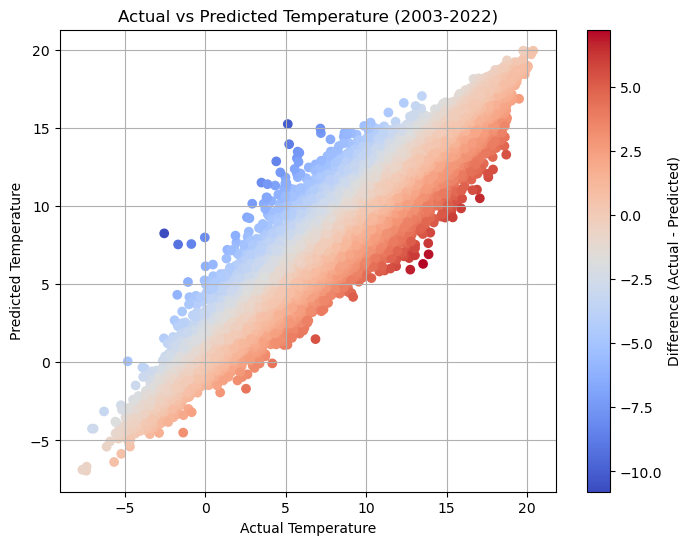

In [108]:
# Calculate the difference between actual and predicted temperature
comparison_df_01['Difference'] = comparison_df_01['Actual_Temp'] - comparison_df_01['Predicted_Temp']

# Create a scatter plot with a colormap representing the difference
plt.figure(figsize=(8, 6))
plt.scatter(comparison_df_01['Actual_Temp'], comparison_df_01['Predicted_Temp'], c=comparison_df_01['Difference'], cmap='coolwarm')

# Add labels and title
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.title('Actual vs Predicted Temperature (2003-2022)')

# Add colorbar
plt.colorbar(label='Difference (Actual - Predicted)')

# Show the plot
plt.grid(True)
plt.show()

## Temp (1993-2022)

In [115]:
# Target variable (future temperatures over the entire grid)
y = df_filtered['Temp'].values

# Features
X = df_filtered.drop(['Temp', 'Temp_Min', 'Temp_Max'], axis=1).values

Mean Squared Error: 0.529613734889819
R-squared Value: 0.9742056876672293


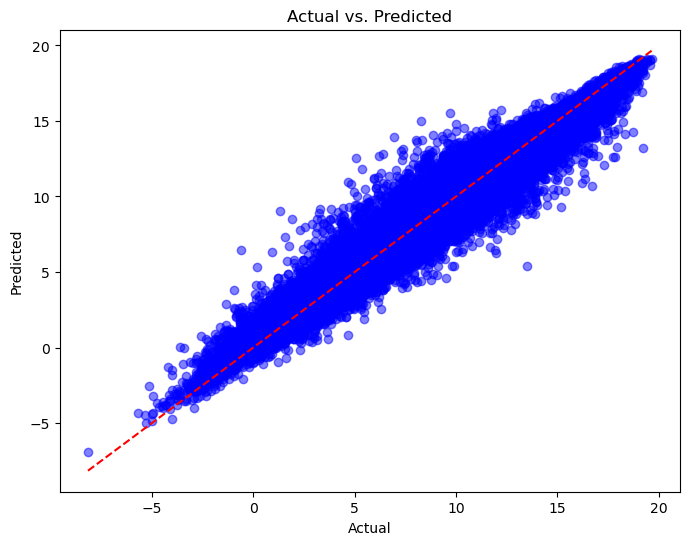

In [116]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and Train the Gradient Boosting Regression Model
rf_regressor = RandomForestRegressor(random_state=42, n_estimators=150)
rf_regressor.fit(X_train, y_train)


y_pred = rf_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared value
r_squared = r2_score(y_test, y_pred)
print("R-squared Value:", r_squared)

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

In [117]:
# Separate the temperature column before prediction
X_temp = new_df_filtered['Temp'].values.reshape(-1, 1)
X_new = new_df_filtered.drop(['Temp', 'Temp_Min', 'Temp_Max'], axis=1).values

# Assuming rf_model is your trained Random Forest model
future_predictions = rf_regressor.predict(X_new)

print(future_predictions)
print(future_predictions.shape)

[6.01652171 6.27348706 6.30079408 ... 3.34210398 3.4587825  3.34251847]
(613830,)


In [118]:
# Assuming X_temp and future_predictions are NumPy arrays
comparison_df_02 = pd.DataFrame({
    'Actual_Temp': X_temp.flatten(),  # Flatten to make sure it's a 1D array
    'Predicted_Temp': future_predictions
})

# Display the DataFrame
print(comparison_df_02)

        Actual_Temp  Predicted_Temp
0          7.000215        6.016522
1          7.290507        6.273487
2          7.686446        6.300794
3          6.707911        6.730586
4          5.956211        6.169731
...             ...             ...
613825     2.843987        1.485862
613826     2.971155        4.369018
613827     2.712619        3.342104
613828     3.238767        3.458783
613829     2.817050        3.342518

[613830 rows x 2 columns]


In [119]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

r2 = r2_score(comparison_df_02['Actual_Temp'], comparison_df_02['Predicted_Temp'])
print(f"R-squared: {r2}")


mae = mean_absolute_error(comparison_df_02['Actual_Temp'], comparison_df_02['Predicted_Temp'])
print(f"Mean Absolute Error: {mae}")


mse = mean_squared_error(comparison_df_02['Actual_Temp'], comparison_df_02['Predicted_Temp'])
print(f"Mean Squared Error: {mse}")

R-squared: 0.971973831593521
Mean Absolute Error: 0.5227632919386428
Mean Squared Error: 0.5732486004412404


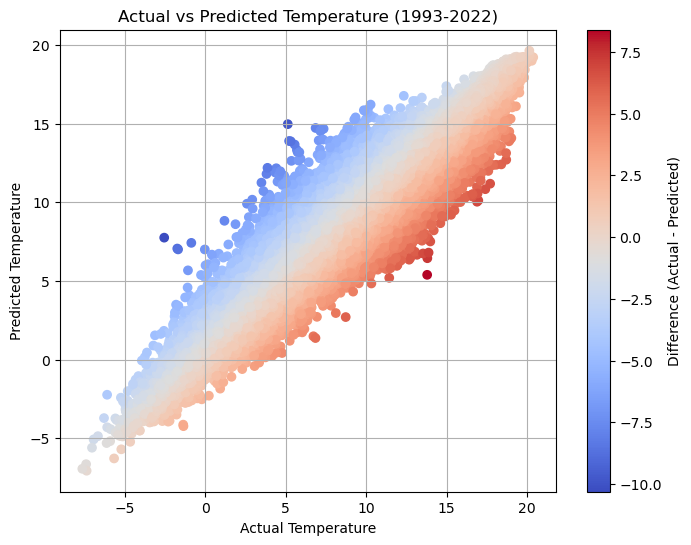

In [120]:
# Calculate the difference between actual and predicted temperature
comparison_df_02['Difference'] = comparison_df_02['Actual_Temp'] - comparison_df_02['Predicted_Temp']

# Create a scatter plot with a colormap representing the difference
plt.figure(figsize=(8, 6))
plt.scatter(comparison_df_02['Actual_Temp'], comparison_df_02['Predicted_Temp'], c=comparison_df_02['Difference'], cmap='coolwarm')

# Add labels and title
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.title('Actual vs Predicted Temperature (1993-2022)')

# Add colorbar
plt.colorbar(label='Difference (Actual - Predicted)')

# Show the plot
plt.grid(True)
plt.show()

## Temp (1980-2022)

In [127]:
# Target variable (future temperatures over the entire grid)
y = df_filtered['Temp'].values

# Features
X = df_filtered.drop(['Temp', 'Temp_Min', 'Temp_Max'], axis=1).values

Mean Squared Error: 0.7494437420352805
R-squared Value: 0.9634326947631194


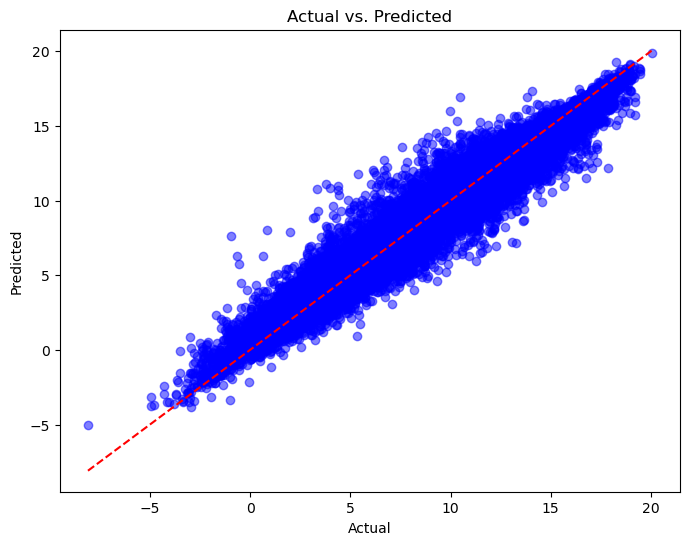

In [128]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and Train the Gradient Boosting Regression Model
rf_regressor = RandomForestRegressor(random_state=42, n_estimators=150)
rf_regressor.fit(X_train, y_train)


y_pred = rf_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared value
r_squared = r2_score(y_test, y_pred)
print("R-squared Value:", r_squared)

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

In [129]:
# Separate the temperature column before prediction
X_temp = new_df_filtered['Temp'].values.reshape(-1, 1)
X_new = new_df_filtered.drop(['Temp', 'Temp_Min', 'Temp_Max'], axis=1).values

# Assuming rf_model is your trained Random Forest model
future_predictions = rf_regressor.predict(X_new)

print(future_predictions)
print(future_predictions.shape)

[6.48669941 6.16087257 6.1518108  ... 2.81846633 2.92660743 3.46262787]
(879829,)


In [130]:
# Assuming X_temp and future_predictions are NumPy arrays
comparison_df_03 = pd.DataFrame({
    'Actual_Temp': X_temp.flatten(),  # Flatten to make sure it's a 1D array
    'Predicted_Temp': future_predictions
})

# Display the DataFrame
print(comparison_df_03)

        Actual_Temp  Predicted_Temp
0          7.382127        6.486699
1          7.335598        6.160873
2          6.905744        6.151811
3          6.342124        6.105123
4          6.522094        4.521201
...             ...             ...
879824     3.691437        2.955589
879825     3.709721        2.909753
879826     3.909819        2.818466
879827     3.445058        2.926607
879828     3.526722        3.462628

[879829 rows x 2 columns]


In [131]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

r2 = r2_score(comparison_df_03['Actual_Temp'], comparison_df_03['Predicted_Temp'])
print(f"R-squared: {r2}")


mae = mean_absolute_error(comparison_df_03['Actual_Temp'], comparison_df_03['Predicted_Temp'])
print(f"Mean Absolute Error: {mae}")


mse = mean_squared_error(comparison_df_03['Actual_Temp'], comparison_df_03['Predicted_Temp'])
print(f"Mean Squared Error: {mse}")

R-squared: 0.9560911220827791
Mean Absolute Error: 0.6701350553423363
Mean Squared Error: 0.8986190038937515


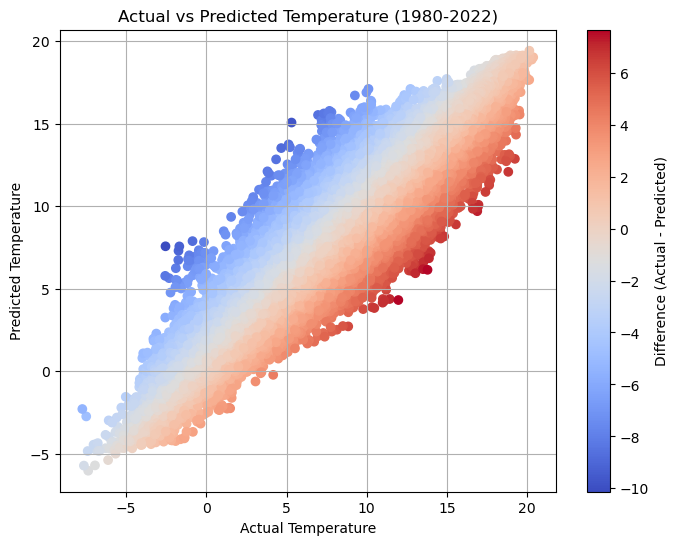

In [132]:
# Calculate the difference between actual and predicted temperature
comparison_df_03['Difference'] = comparison_df_03['Actual_Temp'] - comparison_df_03['Predicted_Temp']

# Create a scatter plot with a colormap representing the difference
plt.figure(figsize=(8, 6))
plt.scatter(comparison_df_03['Actual_Temp'], comparison_df_03['Predicted_Temp'], c=comparison_df_03['Difference'], cmap='coolwarm')

# Add labels and title
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.title('Actual vs Predicted Temperature (1980-2022)')

# Add colorbar
plt.colorbar(label='Difference (Actual - Predicted)')

# Show the plot
plt.grid(True)
plt.show()

## Temp (1975-2022)

In [139]:
# Target variable (future temperatures over the entire grid)
y = df_filtered['Temp'].values

# Features
X = df_filtered.drop(['Temp', 'Temp_Min', 'Temp_Max'], axis=1).values

Mean Squared Error: 0.9156919247149494
R-squared Value: 0.9553878424054837


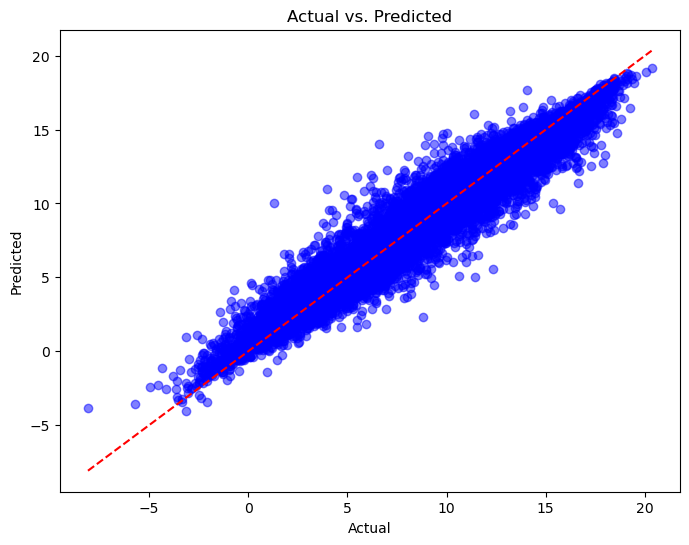

In [140]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and Train the Gradient Boosting Regression Model
rf_regressor = RandomForestRegressor(random_state=42, n_estimators=150)
rf_regressor.fit(X_train, y_train)


y_pred = rf_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared value
r_squared = r2_score(y_test, y_pred)
print("R-squared Value:", r_squared)

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

In [141]:
# Separate the temperature column before prediction
X_temp = new_df_filtered['Temp'].values.reshape(-1, 1)
X_new = new_df_filtered.drop(['Temp', 'Temp_Min', 'Temp_Max'], axis=1).values

# Assuming rf_model is your trained Random Forest model
future_predictions = rf_regressor.predict(X_new)

print(future_predictions)
print(future_predictions.shape)

[5.69945714 5.24801318 4.96549646 ... 2.5221118  2.45400175 3.21033277]
(982139,)


In [142]:
# Assuming X_temp and future_predictions are NumPy arrays
comparison_df_04 = pd.DataFrame({
    'Actual_Temp': X_temp.flatten(),  # Flatten to make sure it's a 1D array
    'Predicted_Temp': future_predictions
})

# Display the DataFrame
print(comparison_df_04)

        Actual_Temp  Predicted_Temp
0          7.700478        5.699457
1          6.837510        5.248013
2          7.893438        4.965496
3          7.365777        5.322529
4          7.105120        5.311047
...             ...             ...
982134     3.691437        2.482661
982135     3.709721        2.442584
982136     3.909819        2.522112
982137     3.445058        2.454002
982138     3.526722        3.210333

[982139 rows x 2 columns]


In [143]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

r2 = r2_score(comparison_df_04['Actual_Temp'], comparison_df_04['Predicted_Temp'])
print(f"R-squared: {r2}")


mae = mean_absolute_error(comparison_df_04['Actual_Temp'], comparison_df_04['Predicted_Temp'])
print(f"Mean Absolute Error: {mae}")


mse = mean_squared_error(comparison_df_04['Actual_Temp'], comparison_df_04['Predicted_Temp'])
print(f"Mean Squared Error: {mse}")

R-squared: 0.9417719764697045
Mean Absolute Error: 0.7847179212020178
Mean Squared Error: 1.1913651743948828


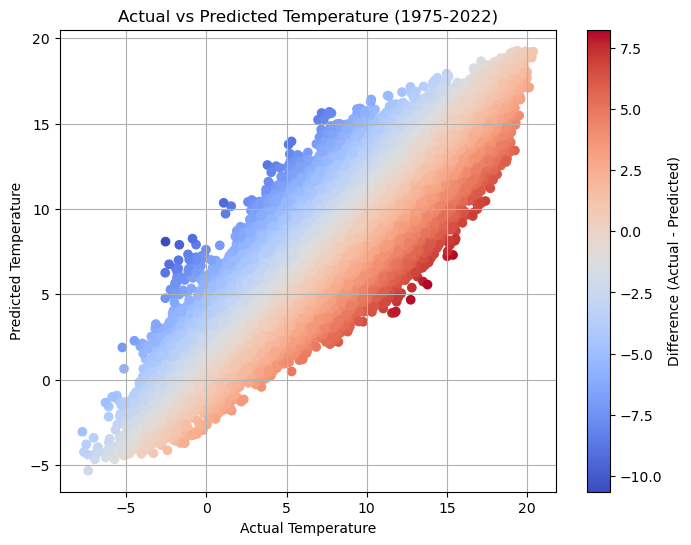

In [144]:
# Calculate the difference between actual and predicted temperature
comparison_df_04['Difference'] = comparison_df_04['Actual_Temp'] - comparison_df_04['Predicted_Temp']

# Create a scatter plot with a colormap representing the difference
plt.figure(figsize=(8, 6))
plt.scatter(comparison_df_04['Actual_Temp'], comparison_df_04['Predicted_Temp'], c=comparison_df_04['Difference'], cmap='coolwarm')

# Add labels and title
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.title('Actual vs Predicted Temperature (1975-2022)')

# Add colorbar
plt.colorbar(label='Difference (Actual - Predicted)')

# Show the plot
plt.grid(True)
plt.show()

## Temp (1970-2022)

In [151]:
# Target variable (future temperatures over the entire grid)
y = df_filtered['Temp'].values

# Features
X = df_filtered.drop(['Temp', 'Temp_Min', 'Temp_Max'], axis=1).values

Mean Squared Error: 2.1797816458832178
R-squared Value: 0.8959412824005529


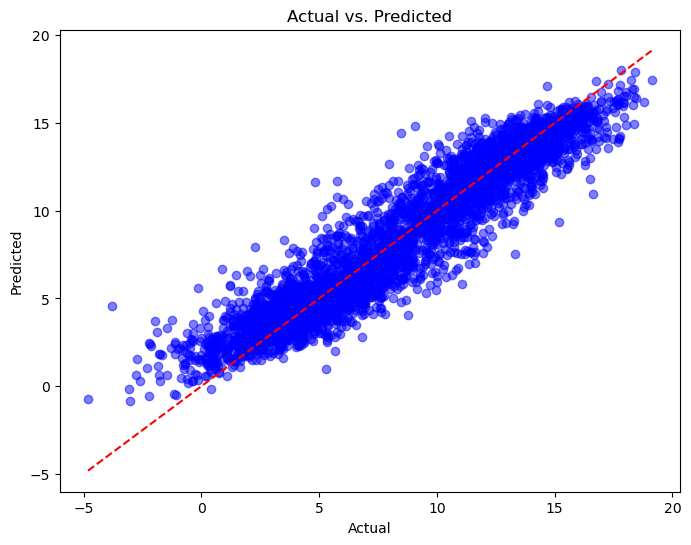

In [152]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and Train the Gradient Boosting Regression Model
rf_regressor = RandomForestRegressor(random_state=42, n_estimators=150)
rf_regressor.fit(X_train, y_train)


y_pred = rf_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared value
r_squared = r2_score(y_test, y_pred)
print("R-squared Value:", r_squared)

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

In [153]:
# Separate the temperature column before prediction
X_temp = new_df_filtered['Temp'].values.reshape(-1, 1)
X_new = new_df_filtered.drop(['Temp', 'Temp_Min', 'Temp_Max'], axis=1).values

# Assuming rf_model is your trained Random Forest model
future_predictions = rf_regressor.predict(X_new)

print(future_predictions)
print(future_predictions.shape)

[5.03295202 5.16501065 3.87934024 ... 3.20190705 1.8022036  3.02949352]
(1084449,)


In [154]:
# Assuming X_temp and future_predictions are NumPy arrays
comparison_df_05 = pd.DataFrame({
    'Actual_Temp': X_temp.flatten(),  # Flatten to make sure it's a 1D array
    'Predicted_Temp': future_predictions
})

# Display the DataFrame
print(comparison_df_05)

         Actual_Temp  Predicted_Temp
0           8.190250        5.032952
1           7.702709        5.165011
2           7.530887        3.879340
3           7.908033        5.777041
4           7.418031        4.004037
...              ...             ...
1084444     3.691437        1.965251
1084445     3.709721        2.191377
1084446     3.909819        3.201907
1084447     3.445058        1.802204
1084448     3.526722        3.029494

[1084449 rows x 2 columns]


In [155]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

r2 = r2_score(comparison_df_05['Actual_Temp'], comparison_df_05['Predicted_Temp'])
print(f"R-squared: {r2}")


mae = mean_absolute_error(comparison_df_05['Actual_Temp'], comparison_df_05['Predicted_Temp'])
print(f"Mean Absolute Error: {mae}")


mse = mean_squared_error(comparison_df_05['Actual_Temp'], comparison_df_05['Predicted_Temp'])
print(f"Mean Squared Error: {mse}")

R-squared: 0.898948982401879
Mean Absolute Error: 1.093180456007919
Mean Squared Error: 2.0676864623766944


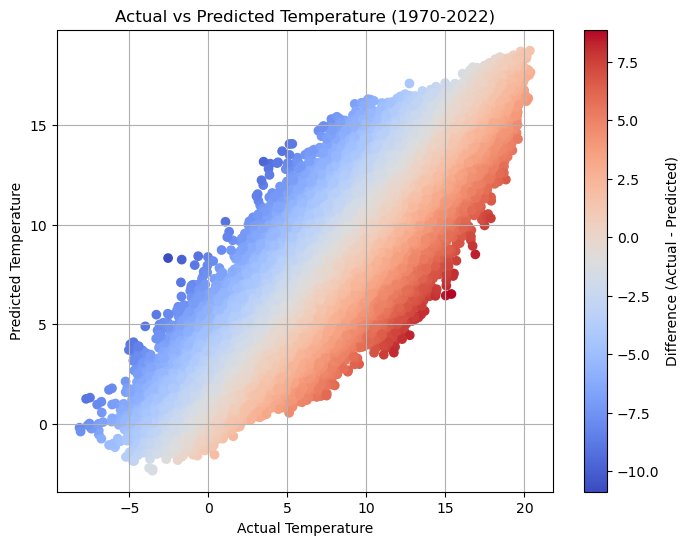

In [156]:
# Calculate the difference between actual and predicted temperature
comparison_df_05['Difference'] = comparison_df_05['Actual_Temp'] - comparison_df_05['Predicted_Temp']

# Create a scatter plot with a colormap representing the difference
plt.figure(figsize=(8, 6))
plt.scatter(comparison_df_05['Actual_Temp'], comparison_df_05['Predicted_Temp'], c=comparison_df_05['Difference'], cmap='coolwarm')

# Add labels and title
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.title('Actual vs Predicted Temperature (1970-2022)')

# Add colorbar
plt.colorbar(label='Difference (Actual - Predicted)')

# Show the plot
plt.grid(True)
plt.show()

## Original

In [175]:
# Target variable (future temperatures over the entire grid)
y = df_filtered['Temp'].values

# Features
X = df_filtered.drop(['Temp', 'Temp_Min', 'Temp_Max'], axis=1).values

Mean Squared Error: 0.37809197645301695
R-squared Value: 0.9814759655779454


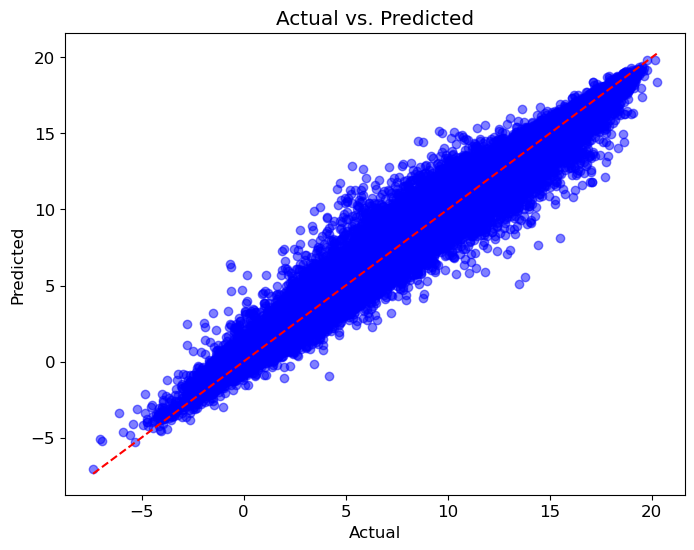

In [176]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and Train the Gradient Boosting Regression Model
rf_regressor = RandomForestRegressor(random_state=42, n_estimators=150)
rf_regressor.fit(X_train, y_train)


y_pred = rf_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared value
r_squared = r2_score(y_test, y_pred)
print("R-squared Value:", r_squared)

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

In [177]:
# Separate the temperature column before prediction
X_temp = new_df_filtered['Temp'].values.reshape(-1, 1)
X_new = new_df_filtered.drop(['Temp', 'Temp_Min', 'Temp_Max'], axis=1).values

# Assuming rf_model is your trained Random Forest model
future_predictions = rf_regressor.predict(X_new)

print(future_predictions)
print(future_predictions.shape)

[6.78238521 6.8090217  6.6092415  ... 3.38026572 3.64074323 3.53896101]
(204610,)


In [178]:
# Assuming X_temp and future_predictions are NumPy arrays
comparison_df_06 = pd.DataFrame({
    'Actual_Temp': X_temp.flatten(),  # Flatten to make sure it's a 1D array
    'Predicted_Temp': future_predictions
})

# Display the DataFrame
print(comparison_df_06)

        Actual_Temp  Predicted_Temp
0          7.066459        6.782385
1          7.171069        6.809022
2          6.388286        6.609242
3          6.395669        6.220444
4          6.753537        6.200353
...             ...             ...
204605     2.843987        1.128396
204606     2.971155        3.826414
204607     2.712619        3.380266
204608     3.238767        3.640743
204609     2.817050        3.538961

[204610 rows x 2 columns]


In [179]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

r2 = r2_score(comparison_df_06['Actual_Temp'], comparison_df_06['Predicted_Temp'])
print(f"R-squared: {r2}")


mae = mean_absolute_error(comparison_df_06['Actual_Temp'], comparison_df_06['Predicted_Temp'])
print(f"Mean Absolute Error: {mae}")


mse = mean_squared_error(comparison_df_06['Actual_Temp'], comparison_df_06['Predicted_Temp'])
print(f"Mean Squared Error: {mse}")

R-squared: 0.9787529594115872
Mean Absolute Error: 0.45381519987673136
Mean Squared Error: 0.4344822445363824


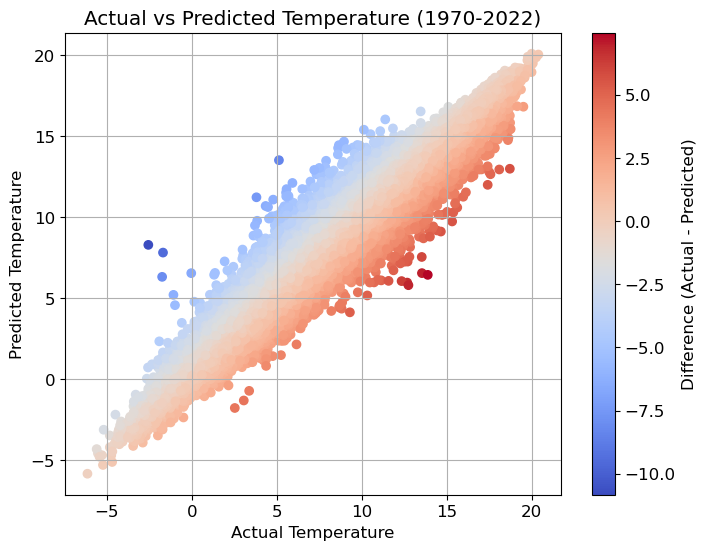

In [180]:
# Calculate the difference between actual and predicted temperature
comparison_df_06['Difference'] = comparison_df_06['Actual_Temp'] - comparison_df_06['Predicted_Temp']

# Create a scatter plot with a colormap representing the difference
plt.figure(figsize=(8, 6))
plt.scatter(comparison_df_06['Actual_Temp'], comparison_df_06['Predicted_Temp'], c=comparison_df_06['Difference'], cmap='coolwarm')

# Add labels and title
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.title('Actual vs Predicted Temperature (1970-2022)')

# Add colorbar
plt.colorbar(label='Difference (Actual - Predicted)')

# Show the plot
plt.grid(True)
plt.show()

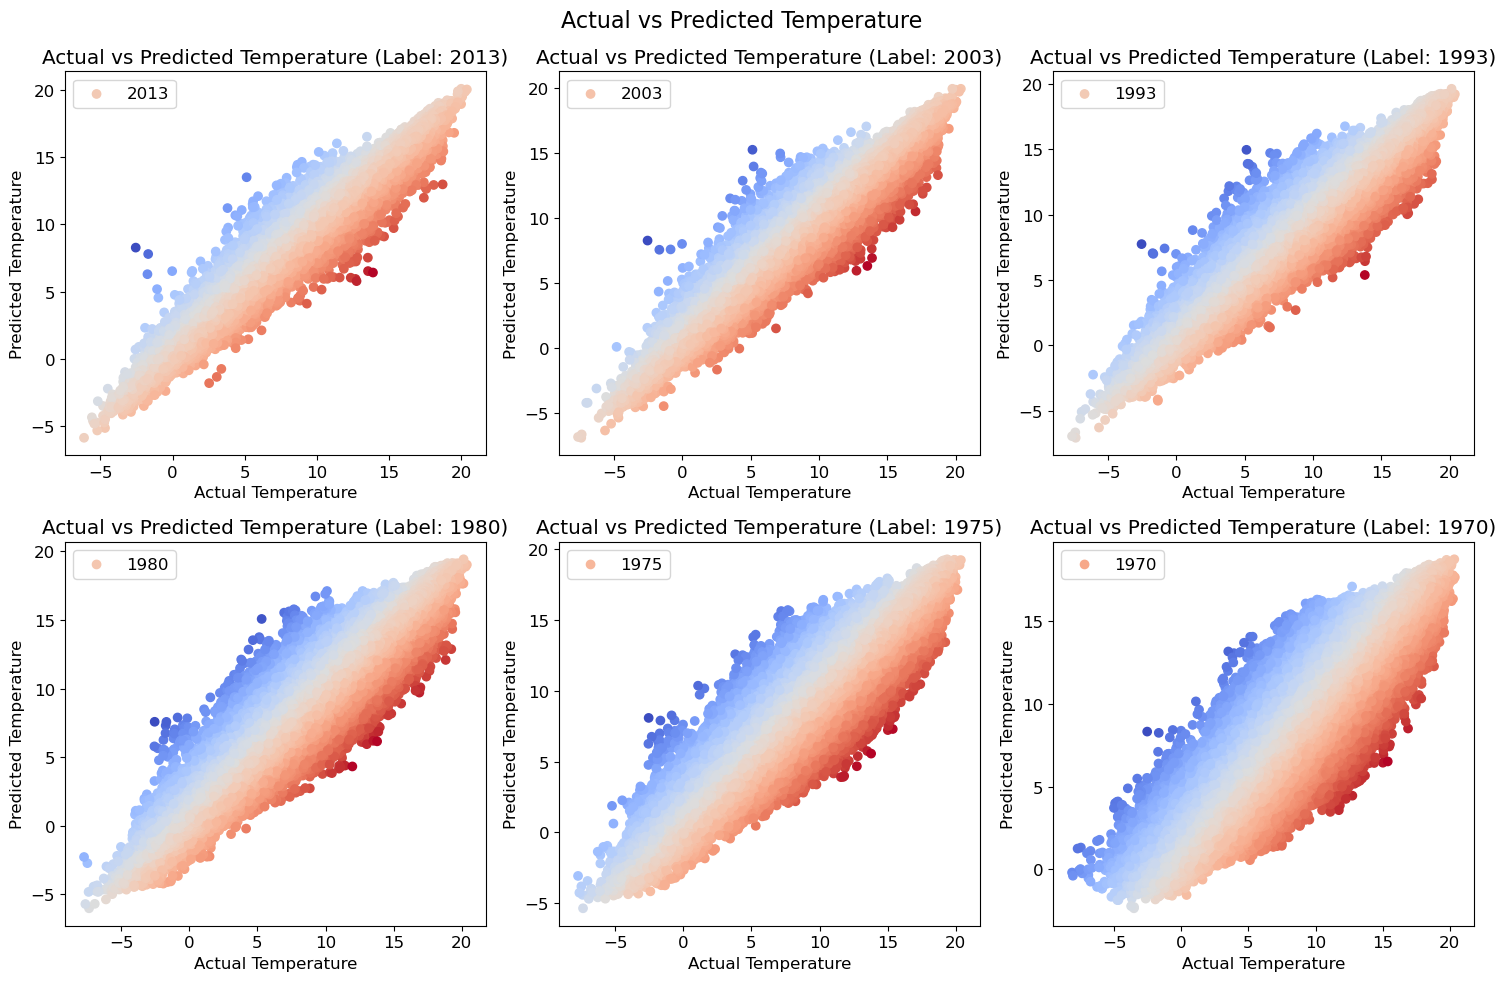

In [182]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # Adjust number of rows/columns as needed

# Data for each subplot (adjust as necessary)
dataframes = [comparison_df_06, comparison_df_01, comparison_df_02, comparison_df_03, comparison_df_04, comparison_df_05]
labels = ['2013', '2003', '1993', '1980', '1975', '1970']

# Iterate over subplots and plot data
for ax, df, label in zip(axes.flat, dataframes, labels):
    ax.scatter(df['Actual_Temp'], df['Predicted_Temp'], c=df['Difference'], label=label, cmap='coolwarm')
    ax.set_xlabel('Actual Temperature')
    ax.set_ylabel('Predicted Temperature')
    ax.set_title(f'Actual vs Predicted Temperature (Label: {label})') 
    ax.legend(loc='upper left')

# Overall title 
fig.suptitle('Actual vs Predicted Temperature', fontsize=16)  
plt.rcParams.update({'font.size': 12}) 
plt.tight_layout()  
plt.show()